In [9]:
# From the course: Bayesin Machine Learning in Python: A/B Testing
# https://deeplearningcourses.com/c/bayesian-machine-learning-in-python-ab-testing
# https://www.udemy.com/bayesian-machine-learning-in-python-ab-testing
from __future__ import print_function, division
from builtins import range
# Note: you may need to update your version of future
# sudo pip install -U future


import matplotlib.pyplot as plt
import numpy as np

In [10]:
NUM_TRIALS = 10000
EPS = 0.1
BANDIT_PROBABILITIES = [0.2, 0.5, 0.75]  # WIN RATES

In [11]:
class Bandit:
  def __init__(self, p):
    # p: the win rate
    self.p = p  # TRUE WIN RATE
    self.p_estimate = 0. # CURRENT WIN RATE
    self.N = 0 # NO OF SAMPLES COLLECTED SO FAR

  def pull(self):
    # draw a 1 with probability p
    return np.random.random() < self.p 

  def update(self, x):
    self.N += 1 
    self.p_estimate = ((self.N - 1)*self.p_estimate +x) / self.N 

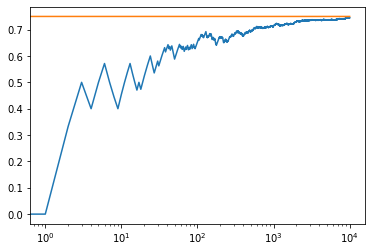

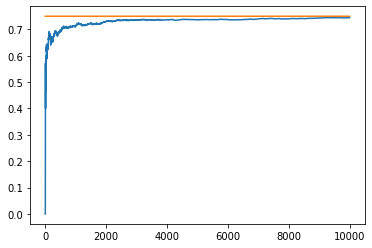

0.13953488372093023
0.5088495575221238
0.7525169508937741
total reward earned: 7446.0
overall win rate: 0.7446
num times selected each bandit: [43, 226, 9734]


In [12]:
def ucb(mean,n,nj):
  return mean + np.sqrt(2*np.log(n)/nj)

def run_experiment():
  bandits = [Bandit(p) for p in BANDIT_PROBABILITIES]
  rewards = np.zeros(NUM_TRIALS)
  total_plays = 0

# initialization : play each bandit once

  for j in range(len(bandits)):

    x = bandits[j].pull()
    total_plays += 1
    bandits[j].update(x)


  for i in range(NUM_TRIALS):

    j = np.argmax([ucb(b.p_estimate,total_plays,b.N) for b in bandits])

    # pull the arm for the bandit with the largest sample
    x = bandits[j].pull()

    total_plays +=1

    # update the distribution for the bandit whose arm we just pulled
    bandits[j].update(x)

    # for the plot
    rewards[i] = x
  cumulative_average = np.cumsum(rewards) / (np.arange(NUM_TRIALS) + 1)

  # plot moving average ctr
  plt.plot(cumulative_average)
  plt.plot(np.ones(NUM_TRIALS)*np.max(BANDIT_PROBABILITIES))
  plt.xscale('log')
  plt.show()

  # plot moving average ctr linear
  plt.plot(cumulative_average)
  plt.plot(np.ones(NUM_TRIALS)*np.max(BANDIT_PROBABILITIES))
  plt.show()

  for b in bandits:
    print(b.p_estimate)

  print("total reward earned:", rewards.sum())
  print("overall win rate:", rewards.sum() / NUM_TRIALS)
  print("num times selected each bandit:", [b.N for b in bandits])

  return cumulative_average

if __name__ == '__main__':
  run_experiment()